In [41]:
# Import Data Set Iris

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data = datasets.load_iris()

#create a DataFrame
df = pd.DataFrame(data.data, columns=data.feature_names)
df['Target'] = pd.DataFrame(data.target)
print(df.shape)
df.head()

(150, 5)


,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm),Target
0,5.1,3.5,1.4,0.2,0
1,4.9,3.0,1.4,0.2,0
2,4.7,3.2,1.3,0.2,0
3,4.6,3.1,1.5,0.2,0
4,5.0,3.6,1.4,0.2,0


In [42]:
# Import Data Set Wine

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import datasets
data2 = datasets.load_wine()

#create a DataFrame
df2 = pd.DataFrame(data2.data, columns=data2.feature_names)
df2['Target'] = pd.DataFrame(data2.target)
print(df2.shape)
df2.head()

(178, 14)


,alcohol,malic_acid,ash,alcalinity_of_ash,magnesium,total_phenols,flavanoids,nonflavanoid_phenols,proanthocyanins,color_intensity,hue,od280/od315_of_diluted_wines,proline,Target
0,14.23,1.71,2.43,15.6,127.0,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065.0,0
1,13.20,1.78,2.14,11.2,100.0,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050.0,0
2,13.16,2.36,2.67,18.6,101.0,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185.0,0
3,14.37,1.95,2.50,16.8,113.0,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480.0,0
4,13.24,2.59,2.87,21.0,118.0,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735.0,0


In [43]:
# List untuk menyimpan titik-titik koordinat data set yang ada
coordinates = []
# List untuk menyimpan titik-titik terluar/solusi convex hull 
solution = []
# List untuk menyimpan titik-titik partisi/sub persoalan convex hull
partition = []

# Fungsi yang mengembalikan sisi dari sebuah titik terhadap garis AB (kiri/kanan/pada garis)
def get_side (A,B,coordinate):

    # Set titik-titik pada garis AB ke x1,y1 dan x2,y2, serta coordinate ke x3,y3
    x1, y1 = A
    x2, y2 = B
    x3, y3 = coordinate

    # Mencari determinan dari titik (x3,y3) ke garis A(x1,y1),B(x2,y2)
    Det = (y2-y1)*x3 + (x1-x2)*y3 + (x2*y1 - x1*y2)
    
    # Mencari apakah titik berada di kiri atau kanan berdasarkan determinan
    if Det > 0:
        return 'right'
    elif Det < 0:
        return 'left'
    else:
        return 'in-line'

# Fungsi yang digunakan untuk mencari titik terluar selanjutnya guna mendapatkan convex hull
def next_hull (partition,A,B):
    #Fungsi melakukan return apabila tidak terdapat titik lagi pada partition
    if len(partition) == 0:
        return
    else:
        # Set titik-titik pada garis AB ke x1,y1 dan x2,y2
        x1, y1 = A
        x2, y2 = B

        # Simpan nilai a,b,c yang nantinya digunaakan untuk mencari jarak
        a = y2 - y1
        b = x1 - x2
        c = x2*y1 - x1*y2

        # Set jarak terjauh = -1, titik C = None
        max_distance = -1
        C = None
        
        # Lakukan iterasi titik-titik (coordinate) pada partition
        # Untuk mencari nilai titik C, dimana C merupakan titik dengan
        # jarak terjauh dari garis AB
        for coordinate in partition:
            x, y = coordinate
            distance = abs(a*x + b*y + c)
            if distance >= max_distance:
                max_distance = distance
                C = coordinate

        # Simpan garis AB pada list newAB
        newAB = [] 
        newAB.append((A,B))

        # Lakukan update pada list solution
        # Jika ditemukan titik C, maka hapus garis AB pada list solution
        # Kemudian masukan garis AC dan CB ke list solution

        # Iterasi untuk menghapus garis AB jika ditemukan titik C
        found = False
        for j in range (len(solution)):
            Test = solution[j]
            Test2 = newAB[0]
            if (np.array_equal(Test,Test2)):
                found = True
                break
        if (found):
            solution.pop(j)

        # Masukkan garis AC dan CB ke list solution
        solution.append((A,C))
        solution.append((C,B))

        # Hapus titik C pada partition setelah update list solution
        for i in range (len(partition)):
            Test3 = partition[i]
            if (np.array_equal(C,Test3)):
                break
        partition.pop(i)
        
        # Cari titik-titik yang berada di sebelah kanan garis AC
        Right_AC = []
        for coordinate in partition:
            side = get_side(A,C,coordinate)
            if side == 'right':
                Right_AC.append(coordinate)
        # Cari titik-titik yang berada di sebelah kanan garis CB
        Right_CB = []
        for coordinate in partition:
            side = get_side(C,B,coordinate)
            if side == 'right':
                Right_CB.append(coordinate)


        # Lakukan hal yang sama pada garis AC dan CB menggunakan divide and conquer 
        # dengan memanggil fungsi next_hull() kembali
        next_hull(Right_AC,A,C)
        next_hull(Right_CB,C,B)

def convex_hull_initial(data):

    # Lakukan pengurutan titik-titik pada data terlebih dahulu berdasarkan nilai X-membesar
    # jika nilai X sama, urutkan berdasarkan Y-membesar
    sorted_coordinates = sorted(data , key=lambda k: [k[0], k[1]])

    # Cari titik terjauh sebelah kanan dan kiri dan simpan menjadi garis AB
    A = sorted_coordinates[0]            #titik terjauh kiri
    B = sorted_coordinates[-1]           #titik terjauh kanan

    # Lakukan iterasi titik-titik (coordinate) pada sorted_coordinates
    # Jika titik coordinates berada di sebelah kanan garis AB, masukkan ke list Right_AB
    # Jika titik coordinates berada di sebelah kiri garis AB, masukkan ke list Left_AB
    Right_AB = []
    Left_AB = []
    for coordinate in sorted_coordinates:
        side = get_side(A,B,coordinate)
        if side == 'right':
            Right_AB.append(coordinate)
        elif side == 'left':
            Left_AB.append(coordinate)
        else:
            pass
    
    # Masukkan garis AB ke dalam list solution sebagai initial solution
    solution.append((A,B))

    # Panggil next_hull() untuk mencari titik-titik solusi convex hull dengan divide dan conquer
    next_hull(Right_AB,A,B)
    next_hull(Left_AB,B,A)

def myConvexHull(data):
    # Panggil fungsi convex_hull_initial() dan simpan titik-titik solusi ke dalam list 'line'
    convex_hull_initial(data)
    line = []
    line.clear()
    for i in range (len(solution)):
        (x1,y1),(x2,y2) = solution[i]
        line_new = (x1,x2)
        line_new2 = (y1,y2)
        line.append(line_new)
        line.append(line_new2)

    return line

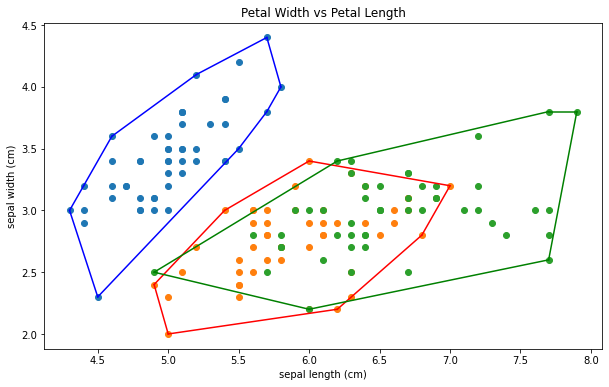

In [44]:
#visualisasi hasil ConvexHull 'Petal Width vs Petal Length'
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Petal Width vs Petal Length')
plt.xlabel(data.feature_names[0])
plt.ylabel(data.feature_names[1])

solution.clear()
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull = myConvexHull(bucket)    #bagian ini diganti dengan hasil implementas ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    if (i==0) :
        j = 0
    while (j <len(hull)):
        plt.plot(hull[j],hull[j+1], colors[i])
        j += 2
    hull.clear()


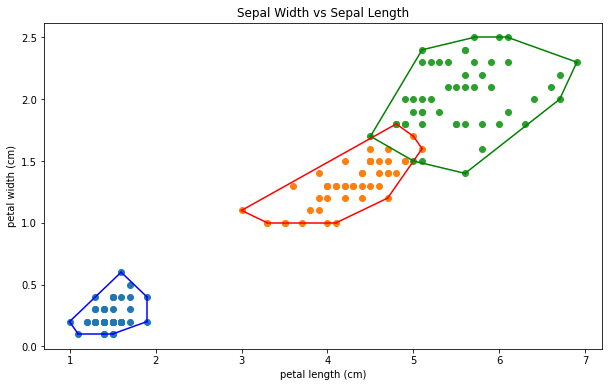

In [45]:
#visualisasi hasil ConvexHull 'Sepal Width vs Sepal Length' pada Data Iris
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('Sepal Width vs Sepal Length')
plt.xlabel(data.feature_names[2])
plt.ylabel(data.feature_names[3])

solution.clear()
for i in range(len(data.target_names)):
    bucket = df[df['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull2 = myConvexHull(bucket)    #bagian ini diganti dengan hasil implementas ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    if (i==0) :
        j = 0
    while (j <len(hull2)):
        plt.plot(hull2[j],hull2[j+1], colors[i])
        j += 2
    hull2.clear()

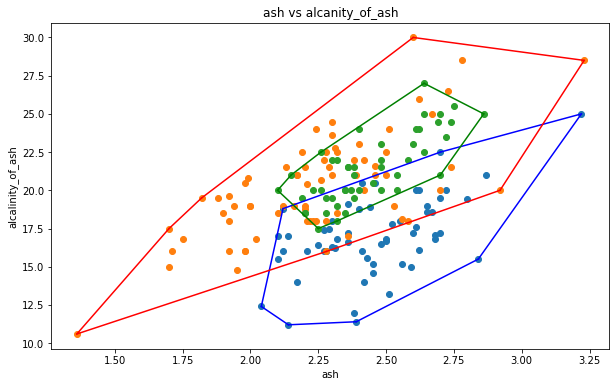

In [46]:
#visualisasi hasil ConvexHull 'ash vs alcanity_of_ash' pada Data Wine
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('ash vs alcanity_of_ash')
plt.xlabel(data2.feature_names[2])
plt.ylabel(data2.feature_names[3])

solution.clear()
for i in range(len(data.target_names)):
    bucket = df2[df2['Target'] == i]
    bucket = bucket.iloc[:,[2,3]].values
    hull2 = myConvexHull(bucket)    #bagian ini diganti dengan hasil implementas ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    if (i==0) :
        j = 0
    while (j <len(hull2)):
        plt.plot(hull2[j],hull2[j+1], colors[i])
        j += 2
    hull2.clear()

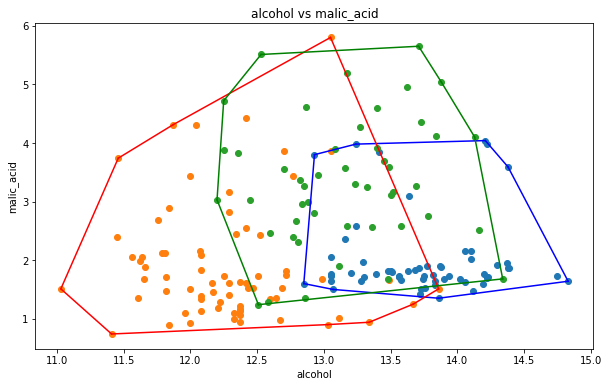

In [47]:
#visualisasi hasil ConvexHull 'alcohol vs malic_acid' pada Data Wine
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('alcohol vs malic_acid')
plt.xlabel(data2.feature_names[0])
plt.ylabel(data2.feature_names[1])

solution.clear()
for i in range(len(data.target_names)):
    bucket = df2[df2['Target'] == i]
    bucket = bucket.iloc[:,[0,1]].values
    hull2 = myConvexHull(bucket)    #bagian ini diganti dengan hasil implementas ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    if (i==0) :
        j = 0
    while (j <len(hull2)):
        plt.plot(hull2[j],hull2[j+1], colors[i])
        j += 2
    hull2.clear()

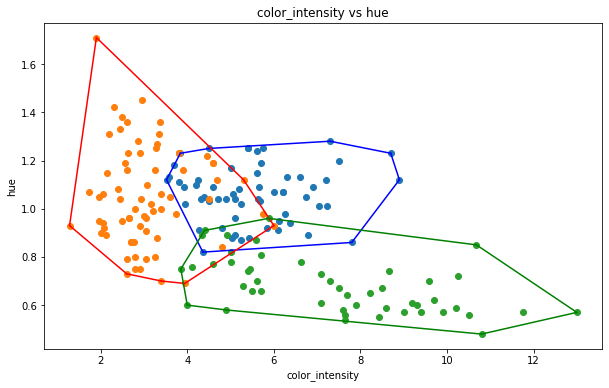

In [48]:
#visualisasi hasil ConvexHull 'color_intensity vs hue' pada Data Wine
import matplotlib.pyplot as plt
plt.figure(figsize = (10, 6))
colors = ['b','r','g']
plt.title('color_intensity vs hue')
plt.xlabel(data2.feature_names[9])
plt.ylabel(data2.feature_names[10])

solution.clear()
for i in range(len(data.target_names)):
    bucket = df2[df2['Target'] == i]
    bucket = bucket.iloc[:,[9,10]].values
    hull2 = myConvexHull(bucket)    #bagian ini diganti dengan hasil implementas ConvexHull Divide & Conquer
    plt.scatter(bucket[:, 0], bucket[:, 1], label=data.target_names[i])
    if (i==0) :
        j = 0
    while (j <len(hull2)):
        plt.plot(hull2[j],hull2[j+1], colors[i])
        j += 2
    hull2.clear()